Video: https://www.youtube.com/watch?v=O_OeWxpnUc0

### Pyplot 
Veamos el modulo Pyplot del paquete Matplotlib

In [1]:
# importamos el modulo de pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Representaremos la función x^2
x = np.linspace(0,2,10)
y = x**2
x

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

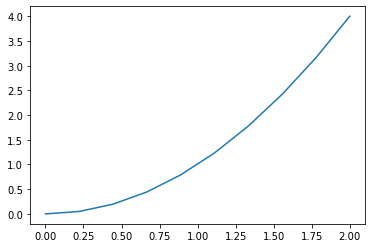

In [3]:
# Representaremos la función con el método .plot()
plt.plot(x,y)
plt.show()

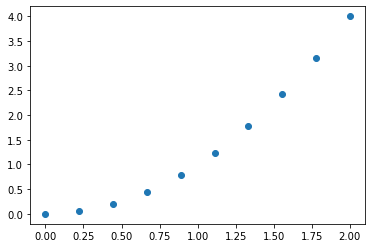

In [4]:
# Exiten otros métodos para reprensentar gráficaente
plt.scatter(x,y)
plt.show()

Entrando más en detalle, el método plot tiene muchos más atributos que pueden ayudarnos a dar formato a los graficos.

plot(X, Y, label=nombre, lw=espesor, ls=tipo de línea, c=color,...)

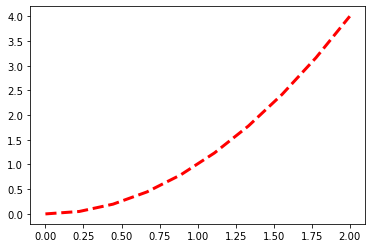

In [5]:
plt.plot(x,y, c='red', lw=3, ls='--')
plt.show()

### Estructura de una figura

In [6]:
# una figura comienza 
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

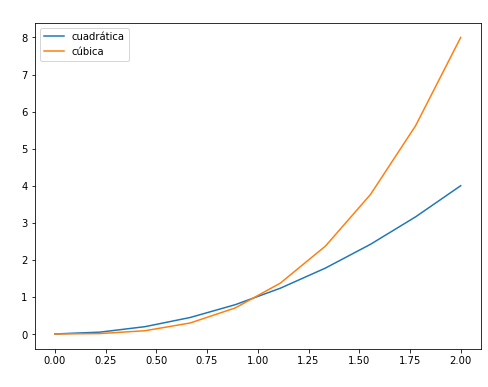

<Figure size 432x288 with 0 Axes>

In [7]:
# Las figuras se representan siguiendo este esquema

plt.figure(figsize=[8,6])            # marco de trabajo
plt.plot(x,y, label='cuadrática')    # curva 1
plt.plot(x,x**3, label='cúbica')     # curva 2
plt.title('fig 1', c='white')
plt.xlabel('eje x', c='white')
plt.ylabel('eje y', c='white')
plt.legend()                         # leyenda
plt.show()                           # metodo visualizador

plt.savefig('fig1.png')              # fichero con el resultado

Podemos crear una rejilla con diferentes gráficas a la vez usando el método **plt.subplot(líneas, columnas, posición)**

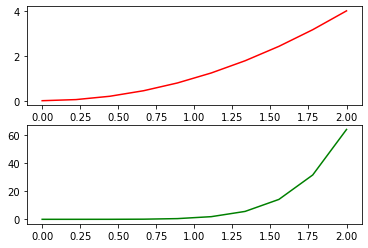

In [8]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x,y,c='red')

plt.subplot(2,1,2)
plt.plot(x,y**3, c='green')

plt.show()

### Representación Orientada a objetos
Haciendo uso del paradigma de POO 

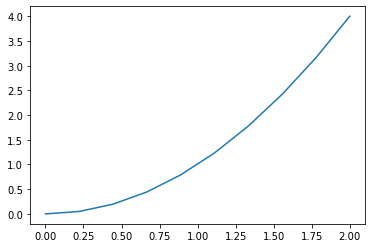

In [9]:
# Usaremos el método .subplots() y lo asignaremos a dos variables "fig" y "ax"

fig, ax = plt.subplots()
ax.plot(x,y)
plt.show()

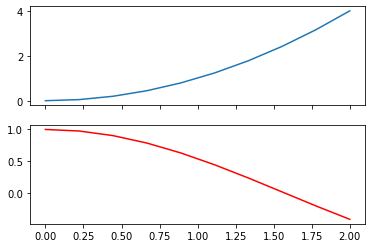

In [10]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(x,y)
ax[1].plot(x, np.cos(x), c='red')
plt.show()

Al utilizar plt.subplots(n), estamos considerando que:
    a. fig es un objeto
    b. ax es una tabla ndarray que contiene los objetos

In [11]:
ax.size

2

In [12]:
type(ax)

numpy.ndarray

In [13]:
type(fig)

matplotlib.figure.Figure

#### Ejercicio

In [72]:
# Tenemos un diccionatio con 4 datasets compuestos por 100 valores cada uno

dataset = {f'registro {i}': np.random.randn(100) for i in range (4)}

In [79]:
# el ejercicio consiste en crear una función que reciba el dataset 
# y que trace n gráficos en una sola figura

def graphique(data):
    
    n = len(data)
    plt.figure(figsize=(12,30))
    
    for k,i in zip(data.keys(), range(1,n+1)):
        
        plt.subplot(n,1,i)
        plt.plot(data[k])
        plt.title(k)

    plt.show()

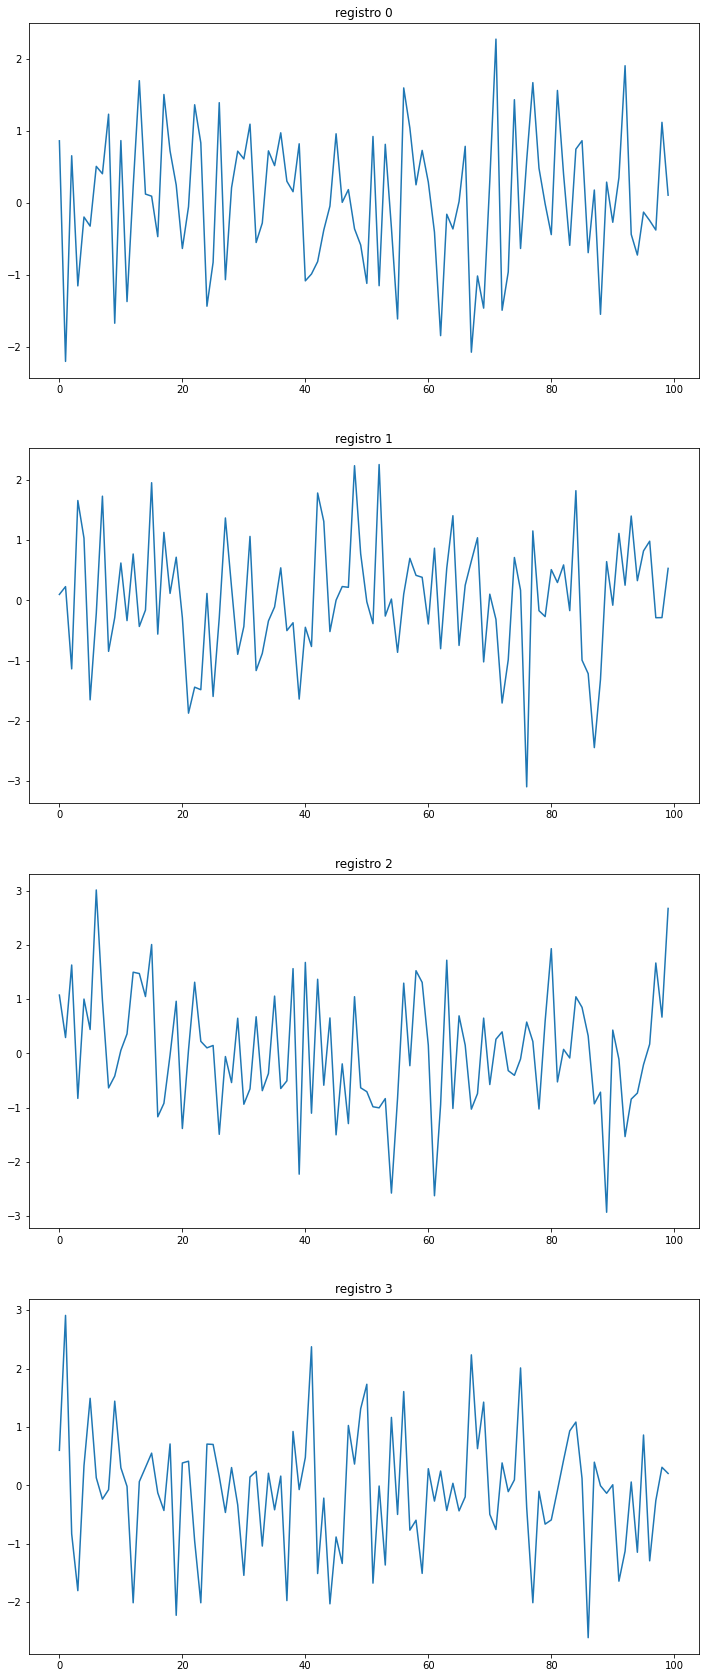

In [80]:
graphique(dataset)

### Representaciones Gráfica

Video: https://www.youtube.com/watch?v=MILtbfrMGL4&t=244s

In [20]:
# Cargamos el dataset de la flor de iris contenido en el paquete sklearn
from sklearn.datasets import load_iris

In [21]:
# asignamos el dataset a la variable iris
iris = load_iris()

x = iris.data
y = iris.target
names = list(iris.target_names)

print(f'x contiene {x.shape[0]} ejemplos y {x.shape[1]} variables')
print(f'hay {np.unique(y).size} clases')

x contiene 150 ejemplos y 4 variables
hay 3 clases


In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

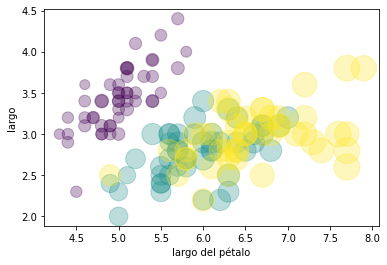

In [23]:
# representación de nube de puntos

# métoco scatter de todos los datos del eje vertical y horizontal, color amarillo
# el parámetro "alpha" controla la transparencia y "s" el tamaño
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.3, s=x[:,2]*100)
plt.xlabel('largo del pétalo')
plt.ylabel('largo')
plt.show()

#### Gráfico 3D

In [24]:
# esta sentencia nos va a permitir visualizar en 3D lo que vamos a representar
# %matplotlib

# de la librería mpl toolkits importamos ejes 3D
from mpl_toolkits.mplot3d import Axes3D

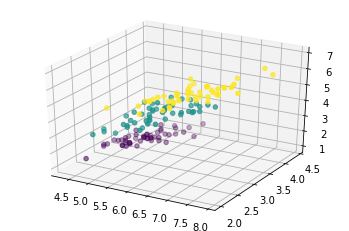

In [25]:
# creamos el objeto ax sobre el que vamos a trabajar
ax = plt.axes(projection = '3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
plt.show()

In [26]:
# imaginemos la función f que creamos con lambda

f = lambda x,y: np.sin(x) + np.cos(x+y)

In [27]:
# definimos el tamaño de los ejes X e Y 

X = np.linspace(0,5,100)
Y = np.linspace(0,5,100)

# construimos una malla bidimensional
X,Y = np.meshgrid(X,Y)

# inyectamos las dos variables en función de f dentro de Z
Z = f(X,Y)
Z.shape

(100, 100)

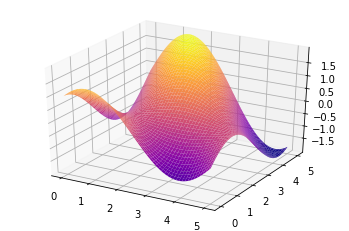

In [28]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

### Histograma

Representan gráficamente la frecuencia de los valores que toma la variable

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

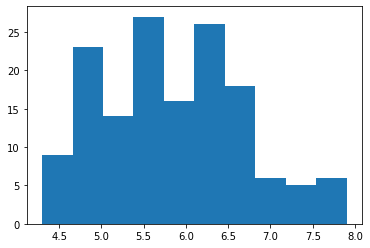

In [33]:
# Para intar un histograma necesitamos la función plt.hist()
plt.hist(x[:,0])



(array([ 4.,  1.,  4.,  2.,  5., 16.,  9.,  4.,  1.,  6., 13.,  8.,  7.,
         3.,  6., 10.,  9.,  7.,  5.,  2., 11.,  4.,  1.,  1.,  4.,  1.,
         0.,  1.,  4.,  1.]),
 array([4.3 , 4.42, 4.54, 4.66, 4.78, 4.9 , 5.02, 5.14, 5.26, 5.38, 5.5 ,
        5.62, 5.74, 5.86, 5.98, 6.1 , 6.22, 6.34, 6.46, 6.58, 6.7 , 6.82,
        6.94, 7.06, 7.18, 7.3 , 7.42, 7.54, 7.66, 7.78, 7.9 ]),
 <a list of 30 Patch objects>)

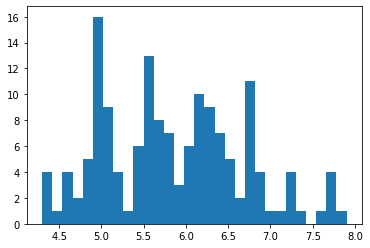

In [35]:
# Podemos crear un histograma más preciso mediante el parámetro bins. Por defecto bins=10
plt.hist(x[:,0], bins=30)


(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

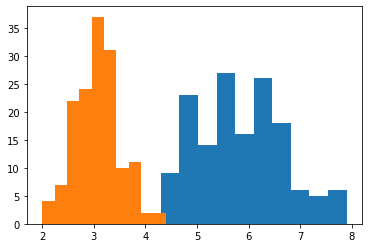

In [36]:
# Podemos estudiar dos histogramas a la vez
plt.hist(x[:,0])
plt.hist(x[:,1])

Los histogramas que hemos visto representan una dimensión, pero podemos introducir histogramas de 2D 

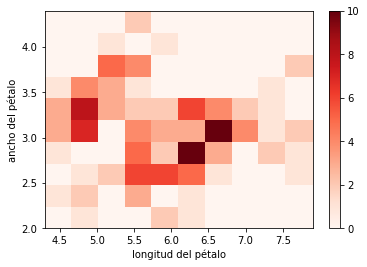

In [42]:
plt.hist2d(x[:,0],x[:,1], cmap='Reds')
plt.xlabel('longitud del pétalo')
plt.ylabel('ancho del pétalo')
plt.colorbar()

Todo esto tiene mucha utilidad a la hora de estudiar imágenes y de analizar los píxeles que la componen

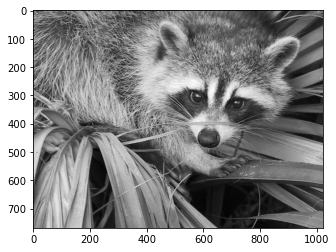

In [44]:
from scipy import misc
face = misc.face(gray=True)
plt.imshow(face, cmap='gray')
plt.show()

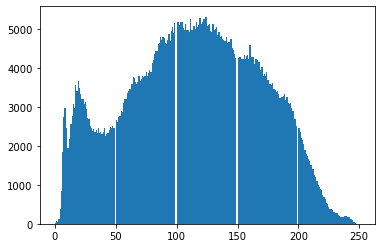

In [45]:
# Usamos la función hist, dividimos el histograma en 255 valores 
plt.hist(face.ravel(), bins=255)
plt.show()

### Graficos de contorno

Este método está muy ligado con el Machine Learning y sobre todo con el concepto del Descenso del Gradiente.

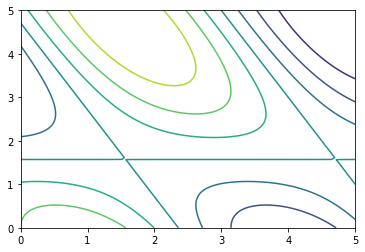

In [50]:
# vamos a reutilizar el gráfico de superficie que creamos
plt.contour(X, Y, Z)
plt.show()

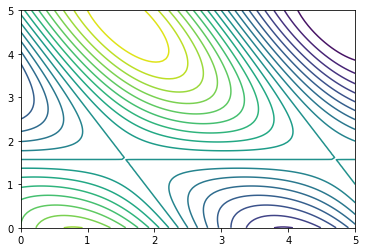

In [51]:
# Podemos afinar la precisión
plt.contour(X, Y, Z, 20)
plt.show()

In [53]:
# Si complicamos un poco más el modelo 
f = lambda x,y: np.sin(x) + np.cos(x+y)*np.cos(x)
X = np.linspace(0,5,100)
Y = np.linspace(0,5,100)

X,Y = np.meshgrid(X,Y)
Z = f(X,Y)

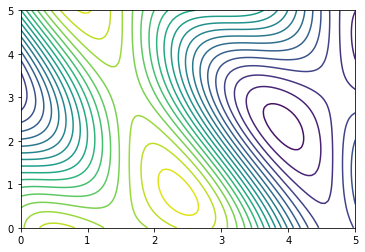

In [58]:
plt.contour(X, Y, Z, 20)
plt.show()

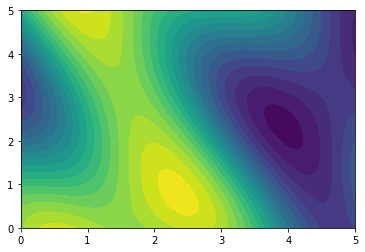

In [59]:
# Usamos contourf para colorear areas
plt.contourf(X, Y, Z, 20)
plt.show()

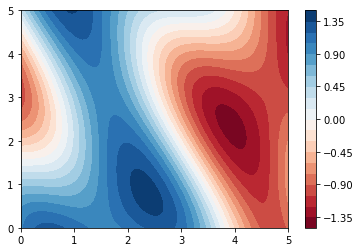

In [68]:
plt.contourf(X, Y, Z, 20, cmap='RdBu')
plt.colorbar()
plt.show()

 ### imshow()
 Es un método muy polivalente que nos permite representar gráficamente cualquier matriz numpy

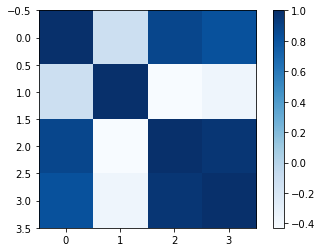

In [69]:
# Le pasamos la traspuesta de x y le calculamos el coeficiente de correlación
plt.imshow(np.corrcoef(x.T), cmap='Blues')
plt.colorbar()
plt.show()